## [Load a dataset from the Hub](https://huggingface.co/docs/datasets/load_hub)

In [1]:
from datasets import load_dataset_builder

# To inspect dataset, without loading it
# [datasets.load_dataset_builder](https://huggingface.co/docs/datasets/v2.17.0/en/package_reference/loading_methods#datasets.load_dataset_builder)
ds_builder = load_dataset_builder("rotten_tomatoes")

c:\Users\hiroga\miniconda3\envs\huggingface-datasets-vision\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
ds_builder.info.description

"Movie Review Dataset.\nThis is a dataset of containing 5,331 positive and 5,331 negative processed\nsentences from Rotten Tomatoes movie reviews. This data was first used in Bo\nPang and Lillian Lee, ``Seeing stars: Exploiting class relationships for\nsentiment categorization with respect to rating scales.'', Proceedings of the\nACL, 2005.\n"

In [3]:
ds_builder.info.features

{'text': Value(dtype='string', id=None),
 'label': ClassLabel(names=['neg', 'pos'], id=None)}

In [12]:
from datasets import load_dataset

dataset = load_dataset("rotten_tomatoes")
print(dataset)

DatasetDict({
    train: Dataset({
        features: ['text', 'label'],
        num_rows: 8530
    })
    validation: Dataset({
        features: ['text', 'label'],
        num_rows: 1066
    })
    test: Dataset({
        features: ['text', 'label'],
        num_rows: 1066
    })
})


In [8]:
# Try to inspect local dataset
ds_builder_local = load_dataset_builder("data/pokemon")
print(ds_builder_local.info.description) # Show nothing
print(ds_builder_local.info.features)    # None

Resolving data files: 100%|██████████| 37/37 [00:00<?, ?it/s]

In [9]:
from datasets import get_dataset_split_names

# If "data/pokemon" has only "Eevee" folder, then it will return ['train']
get_dataset_split_names("data/pokemon") # ['train']

Resolving data files: 100%|██████████| 37/37 [00:00<?, ?it/s]


['train']

In [27]:
from datasets import load_dataset

pokemon_dataset = load_dataset("data/pokemon")
print(pokemon_dataset)

Resolving data files: 100%|██████████| 37/37 [00:00<00:00, 37011.51it/s]

DatasetDict({
    train: Dataset({
        features: ['image'],
        num_rows: 37
    })
})


C:\Users\hiroga\Documents\GitHub\til\software-engineering\huggingface\datasets\_src\vison\data\pokemon\Eevee\005e226cbfc34ed1bb93eac9a82c9921.jpg


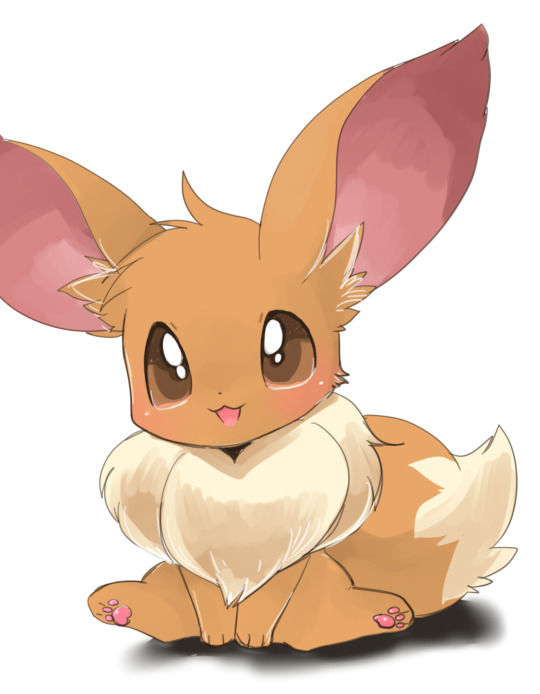

In [24]:
image = pokemon_dataset["train"][0]["image"]
print(image.filename)
image

## [Know your dataset](https://huggingface.co/docs/datasets/access)

In [15]:
# dataset[0] # KeyError: "Invalid key: 0. Please first select a split. For example: `my_dataset_dictionary['train'][0]`. Available splits: ['test', 'train', 'validation']"
dataset["train"][0] # OR load with split, like load_dataset("rotten_tomatoes", split="train")

{'text': 'the rock is destined to be the 21st century\'s new " conan " and that he\'s going to make a splash even greater than arnold schwarzenegger , jean-claud van damme or steven segal .',
 'label': 1}

In [16]:
pokemon_dataset["train"][0] # {'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=540x694>} めっちゃ便利

{'image': <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=540x694>}

In [18]:
pokemon_dataset["train"]["image"][:5] # Dataset can take 2 types of indexing, for items or features

[<PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=540x694>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=536x557>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=243x300>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=534x505>,
 <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=425x524>]

## [Preprocess](https://huggingface.co/docs/datasets/use_dataset)

In [19]:
from transformers import AutoTokenizer
from datasets import load_dataset

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")
dataset = load_dataset("rotten_tomatoes", split="train")

None of PyTorch, TensorFlow >= 2.0, or Flax have been found. Models won't be available and only tokenizers, configuration and file/data utilities can be used.
tokenizer.json: 100%|██████████| 466k/466k [00:00<00:00, 931kB/s]


In [20]:
tokenizer(dataset[0]["text"])

{'input_ids': [101, 1996, 2600, 2003, 16036, 2000, 2022, 1996, 7398, 2301, 1005, 1055, 2047, 1000, 16608, 1000, 1998, 2008, 2002, 1005, 1055, 2183, 2000, 2191, 1037, 17624, 2130, 3618, 2084, 7779, 29058, 8625, 13327, 1010, 3744, 1011, 18856, 19513, 3158, 5477, 4168, 2030, 7112, 16562, 2140, 1012, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [21]:
from datasets import Dataset

def tokenization(example: Dataset):
    return tokenizer(example["text"])

dataset = dataset.map(tokenization, batched=True)

Map: 100%|██████████| 8530/8530 [00:00<00:00, 28429.93 examples/s]


In [24]:
# Crop images
import torchvision.transforms.functional as TF
from datasets import Dataset
from typing import Tuple

def crop_image(example: Dataset, size: Tuple[int, int]):
    return TF.center_crop(example["image"], size)

cropped_dataset = pokemon_dataset.map(lambda example: {"image": TF.center_crop(example["image"], (100, 100))})
print(cropped_dataset["train"]["image"][:5])


[<PIL.PngImagePlugin.PngImageFile image mode=RGB size=100x100 at 0x138CC7DDD60>, <PIL.PngImagePlugin.PngImageFile image mode=RGB size=100x100 at 0x138CC7DDD30>, <PIL.PngImagePlugin.PngImageFile image mode=RGB size=100x100 at 0x138CC7DC260>, <PIL.PngImagePlugin.PngImageFile image mode=RGB size=100x100 at 0x138CC7DC9B0>, <PIL.PngImagePlugin.PngImageFile image mode=RGB size=100x100 at 0x138CC7DDD90>]


## [Evaluate predictions](https://huggingface.co/docs/datasets/metrics)

In [28]:
from datasets import load_metric

path = 'glue'
config_name = 'mrpc'

metric = load_metric(path, config_name)
print(metric)

c:\Users\hiroga\miniconda3\envs\huggingface-datasets-vision\Lib\site-packages\datasets\load.py:752: FutureWarning: The repository for glue contains custom code which must be executed to correctly load the metric. You can inspect the repository content at https://raw.githubusercontent.com/huggingface/datasets/2.16.1/metrics/glue/glue.py
You can avoid this message in future by passing the argument `trust_remote_code=True`.
Passing `trust_remote_code=True` will be mandatory to load this metric from the next major release of `datasets`.
  warnings.warn(


Metric(name: "glue", features: {'predictions': Value(dtype='int64', id=None), 'references': Value(dtype='int64', id=None)}, usage: """
Compute GLUE evaluation metric associated to each GLUE dataset.
Args:
    predictions: list of predictions to score.
        Each translation should be tokenized into a list of tokens.
    references: list of lists of references for each translation.
        Each reference should be tokenized into a list of tokens.
Returns: depending on the GLUE subset, one or several of:
    "accuracy": Accuracy
    "f1": F1 score
    "pearson": Pearson Correlation
    "spearmanr": Spearman Correlation
    "matthews_correlation": Matthew Correlation
Examples:

    >>> glue_metric = datasets.load_metric('glue', 'sst2')  # 'sst2' or any of ["mnli", "mnli_mismatched", "mnli_matched", "qnli", "rte", "wnli", "hans"]
    >>> references = [0, 1]
    >>> predictions = [0, 1]
    >>> results = glue_metric.compute(predictions=predictions, references=references)
    >>> print(res